<a href="https://colab.research.google.com/github/sathwikkes/Yelp-Image-Classification/blob/main/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I will be working with Yelp Image Data set

In [2]:
#!pip list -v 
#checking/making sure I have the proper modules loaded

In [3]:
# importing necessary modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os 
import io
import seaborn as sns

In [6]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import files
uploaded = files.upload()

Saving photos.json to photos (1).json


In [8]:
!ls "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics"

0bhL0XvLMxn-W-fu2c7pkA.jpg  LACFwSDXK1TkzshiClPNSg.jpg
0eFLVEyJhskLZgnbecseKg.jpg  LaMaaveIZ6WMnaMNZIRKnw.jpg
0FfYeFWmxcJqxwyN5PZPbw.jpg  LB7-3ZxBaE6PokcOyPQHpw.jpg
0glSs9z_jEE5VYVUwrsFIA.jpg  lB8qcTqjKHoGYUk5A-eHuA.jpg
0ifISIekaQ9xge4_fXyHwg.jpg  -LDLckzf2OJSI96g9XEuug.jpg
0l9g6eCBTBYVe8VURWzuWA.jpg  LDTQa4fC1bEsqZflEZEzqQ.jpg
0tzhrVSBrGFZbxA5zBlIzw.jpg  lglNhT_InWzWCXAWAdp7ZA.jpg
0U3nkhi4ks1o7ZR-W92C0w.jpg  lGpIKmRHCYzWRIKqROR3XQ.jpg
0WStWnSJ7kxD9n45MeN3Xg.jpg  LI4FSMSkhhn1FmdgPkMV3Q.jpg
0_YxnDNHkUyRZwCHLMPk3A.jpg  L_i62CXPMl4FjINAiV8Zbg.jpg
10MyLtmt8jEEozsaKa9ZVg.jpg  LilrP63vCBPJjKASHF47FQ.jpg
12LWSbZYRu1bDgQyiophpA.jpg  lIRGDCrKQlyTwO0OR5-zIQ.jpg
16dzhdUbawxXoUGRBTkGlw.jpg  LJ4KTFk-yFMkmL2KK2i7-Q.jpg
1AFo7PjF93s7MTolODUzHA.jpg  lkMk8vSftvbhx4RAjb1KzA.jpg
1Ds4NqGzjXmper2ZWlaLMA.jpg  lLH4bcgsnySoqGDq-1Gh7A.jpg
1ja5zoVg25Y7SGk8a7p4rw.jpg  Lmo_XNZgzJPVKgcFxLXHng.jpg
1jWcXbg8gSsG3TfLbyrcHw.jpg  lMVOyF2SpNSWm3o5TpKRig.jpg
1Mw8JeRs6x8sOKOHbI8r_Q.jpg  Ln47Qjxtf4Isqe1FH83NMw.jpg
1SVTM394vE

# New Section

In [9]:
data = pd.read_json(uploaded.get('photos.json'), lines=True)


In [10]:
data.head()

,photo_id,business_id,caption,label
0,001kKc6P_rmgaXThAHxEkw,zKZc8GwCaKbACaV0HZAmpg,Clean and simple interior,inside
1,002gqWfVal1D2DT6oA-bVQ,qnZzSC4TKen19Gz9nyKCvw,12oz. Boneless Ribeye | Grilled to perfection ...,food
2,002GtTSYyQ4swIZyEnfF5A,9km51KaQujxsSgdaG9gYSw,"The Most Yummy Tarts: Chantilly, Guava, Salted...",food
3,0036yehPJxVwNZDRDYH2jQ,Qg9L37JCd-PkcWMj9VAWmw,Dynamic Duo! Great dance music!,inside
4,003Isvt6NCJ567PdAEwrfA,zgQHtqX0gqMw1nlBZl2VnQ,,food


In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.shape

(200000, 4)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200000 non-null  object
 1   business_id  200000 non-null  object
 2   caption      200000 non-null  object
 3   label        200000 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [14]:
data.describe()

,photo_id,business_id,caption,label
count,200000,200000,200000,200000
unique,200000,39830,72475,5
top,seoagPzynmyrZXfzxnAqxg,RESDUcs7fIiihp38-d6_6g,,food
freq,1,652,107420,118597


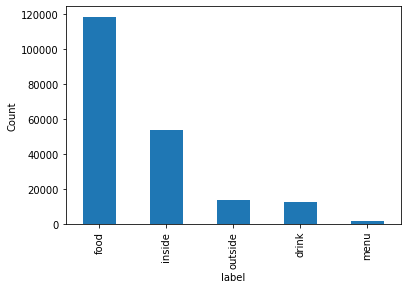

In [15]:
data.label.value_counts().plot(kind='bar', xlabel='label', ylabel='Count')

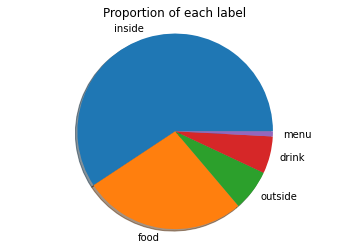

In [20]:
plt.pie(data.label.value_counts(), explode=None, labels= data.label.unique(), shadow=True)
plt.axis('equal')
plt.title('Proportion of each label')
plt.show()

In [ ]:
data['path'] = df['photo_id'].map()

In [22]:
import glob
img_dir = '/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics' 

data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)

# creaing dictionary with key as photo_id and value as image path
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x 
                     for x in glob.glob(data_path)}


In [24]:
data['path'] = data['photo_id'].map(imageid_path_dict.get)


In [35]:
# listing all the paths of the pictures that were imported
data[data.path.notnull()]['path']

636       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
933       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1044      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1167      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1367      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
                                ...                        
199363    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199600    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199647    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199648    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199985    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
Name: path, Length: 1000, dtype: object

In [36]:
data.iloc[636]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0bhL0XvLMxn-W-fu2c7pkA.jpg'

In [37]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0bhL0XvLMxn-W-fu2c7pkA.jpg') 

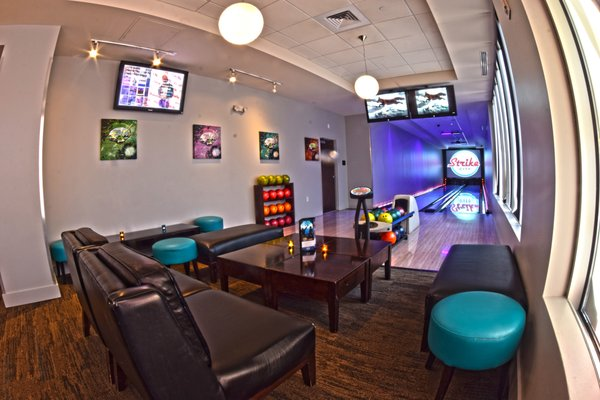

In [42]:
# have to import this module bc cv2.imshow() does not work in colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)  